In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import copy
import mpl_toolkits.axisartist as axisartist
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['savefig.dpi'] = 1000  
plt.rcParams['figure.dpi'] = 1000 

Load data

In [3]:
results = np.load('./results/result.npy', allow_pickle=True)
results = results.ravel()[0]
spk = results['spk']
label = results["label"].detach().cpu().numpy().reshape(28, 28)
img = results["img"].reshape(28, 28).detach().cpu().numpy()
label, img = img, label
spk = spk.reshape(spk.shape[0], spk.shape[1], 28, 28)

Draw the input image and its label

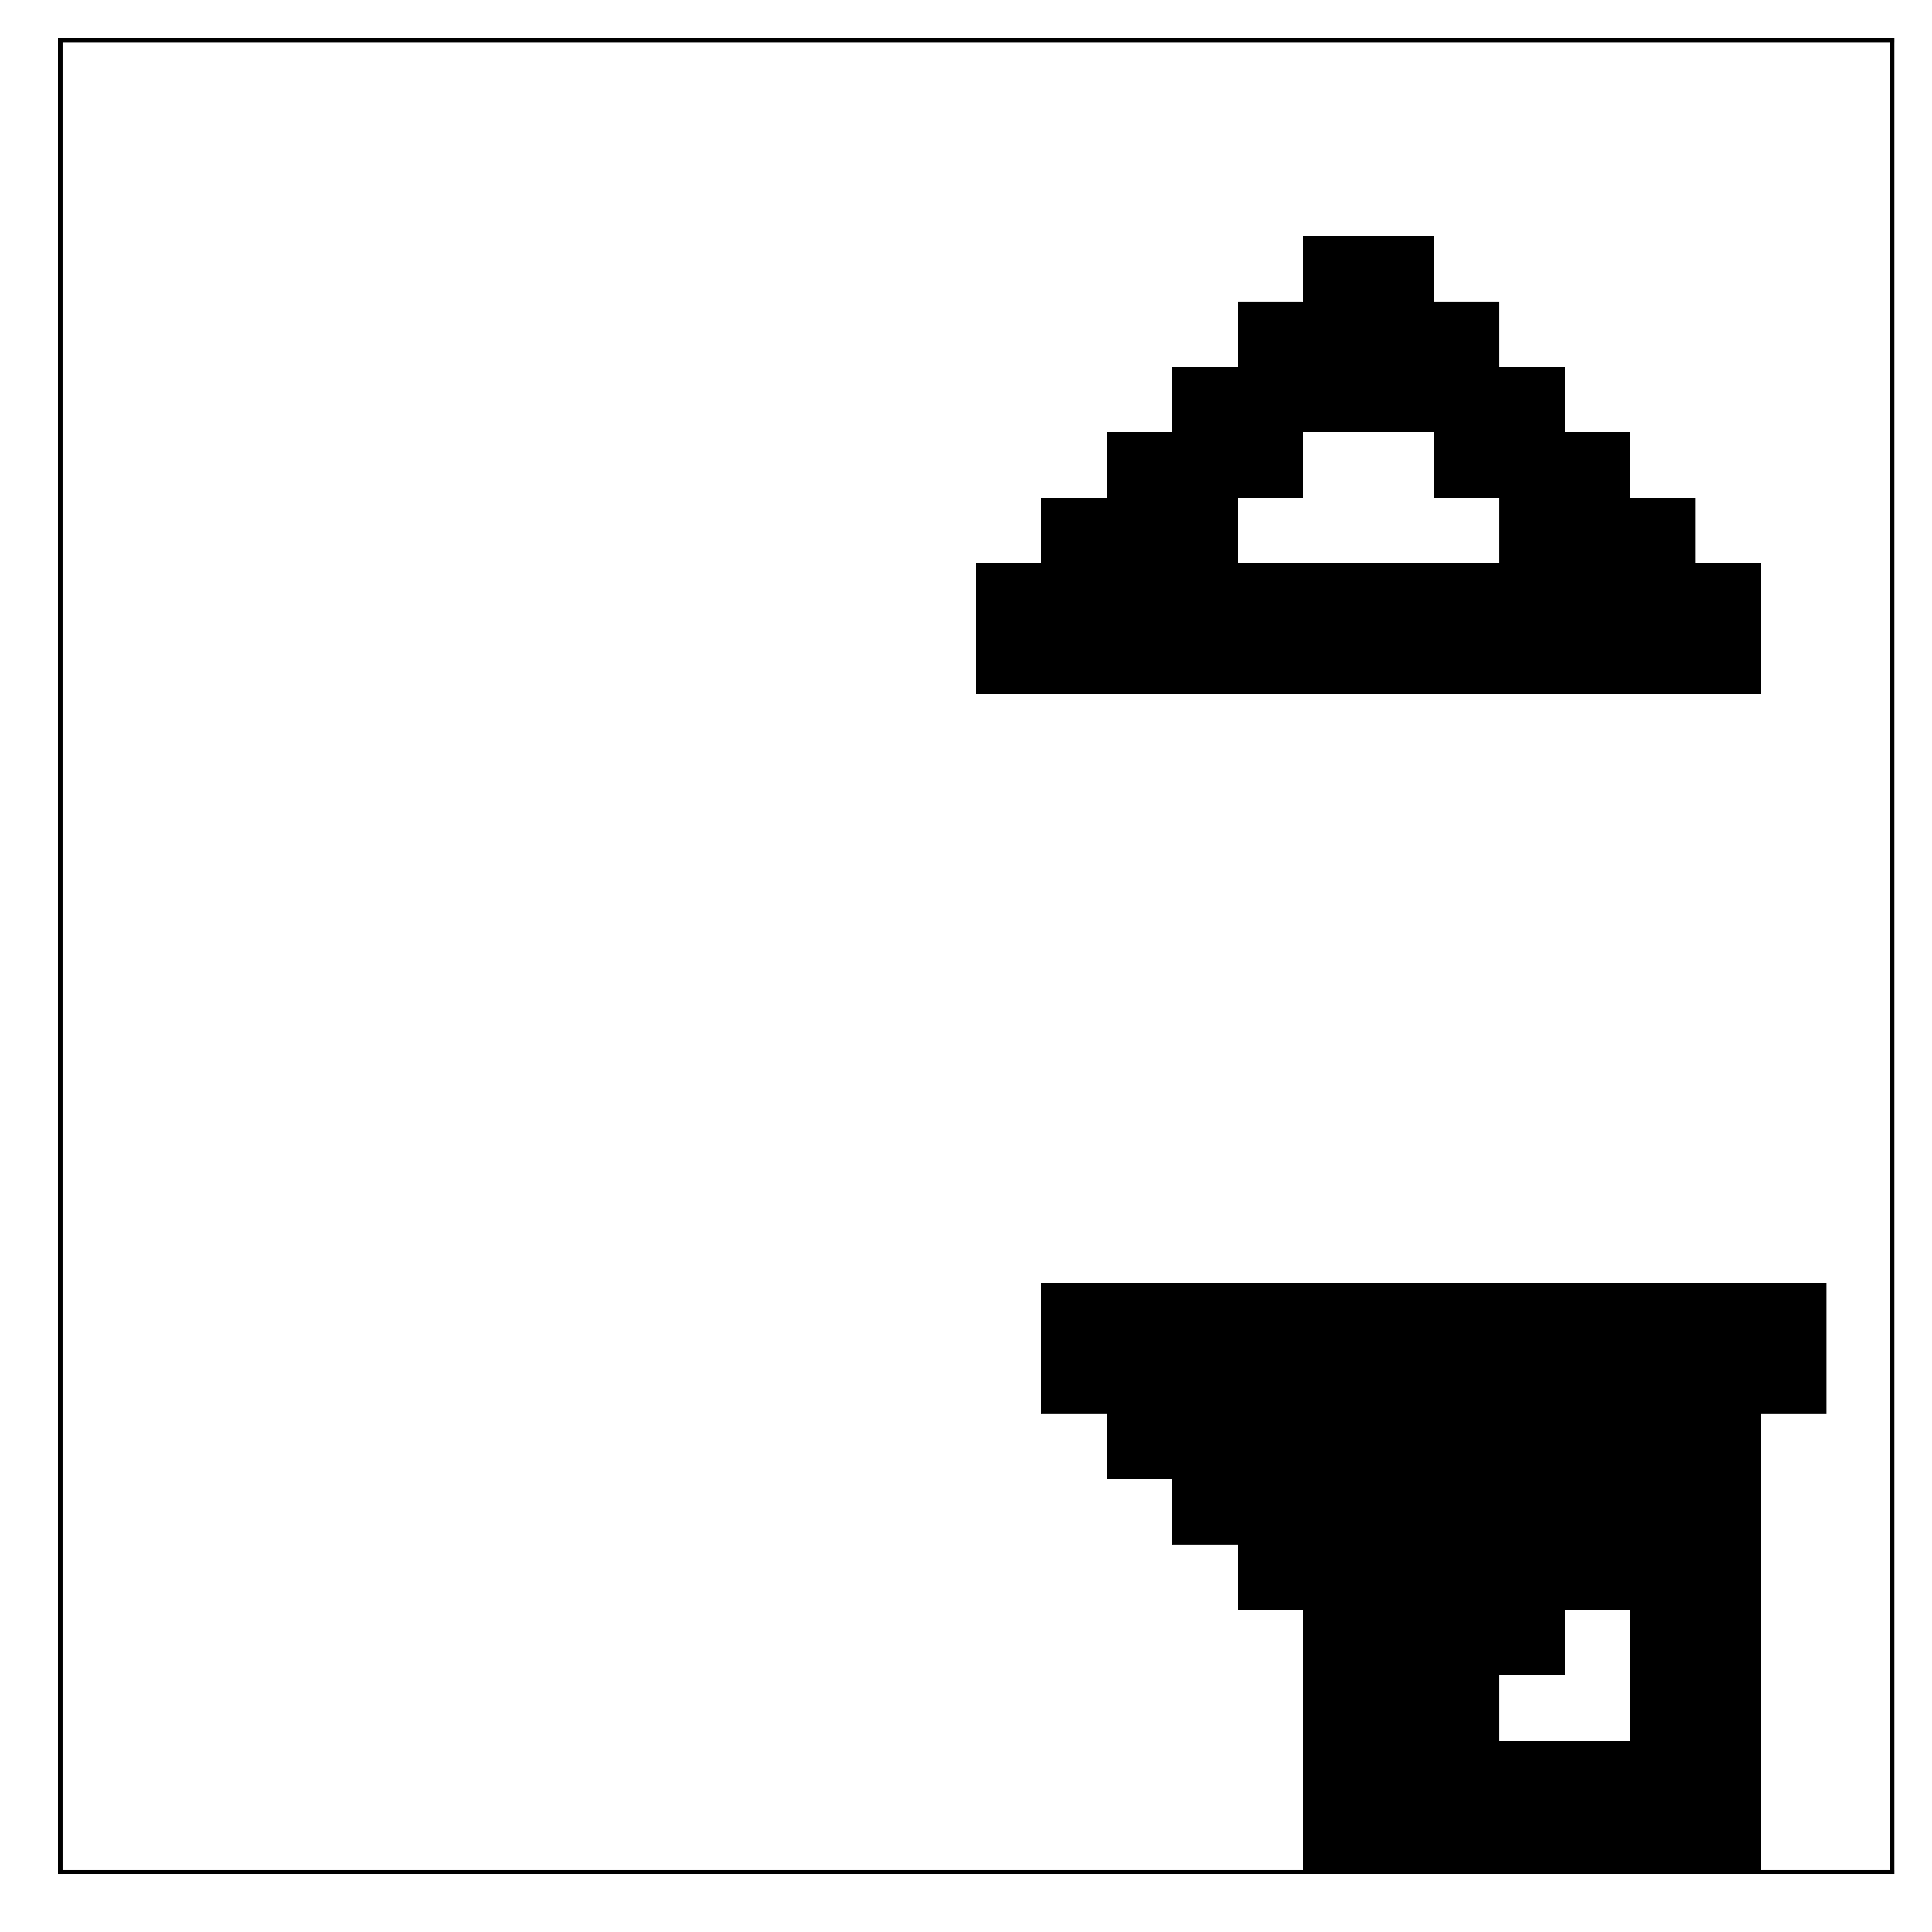

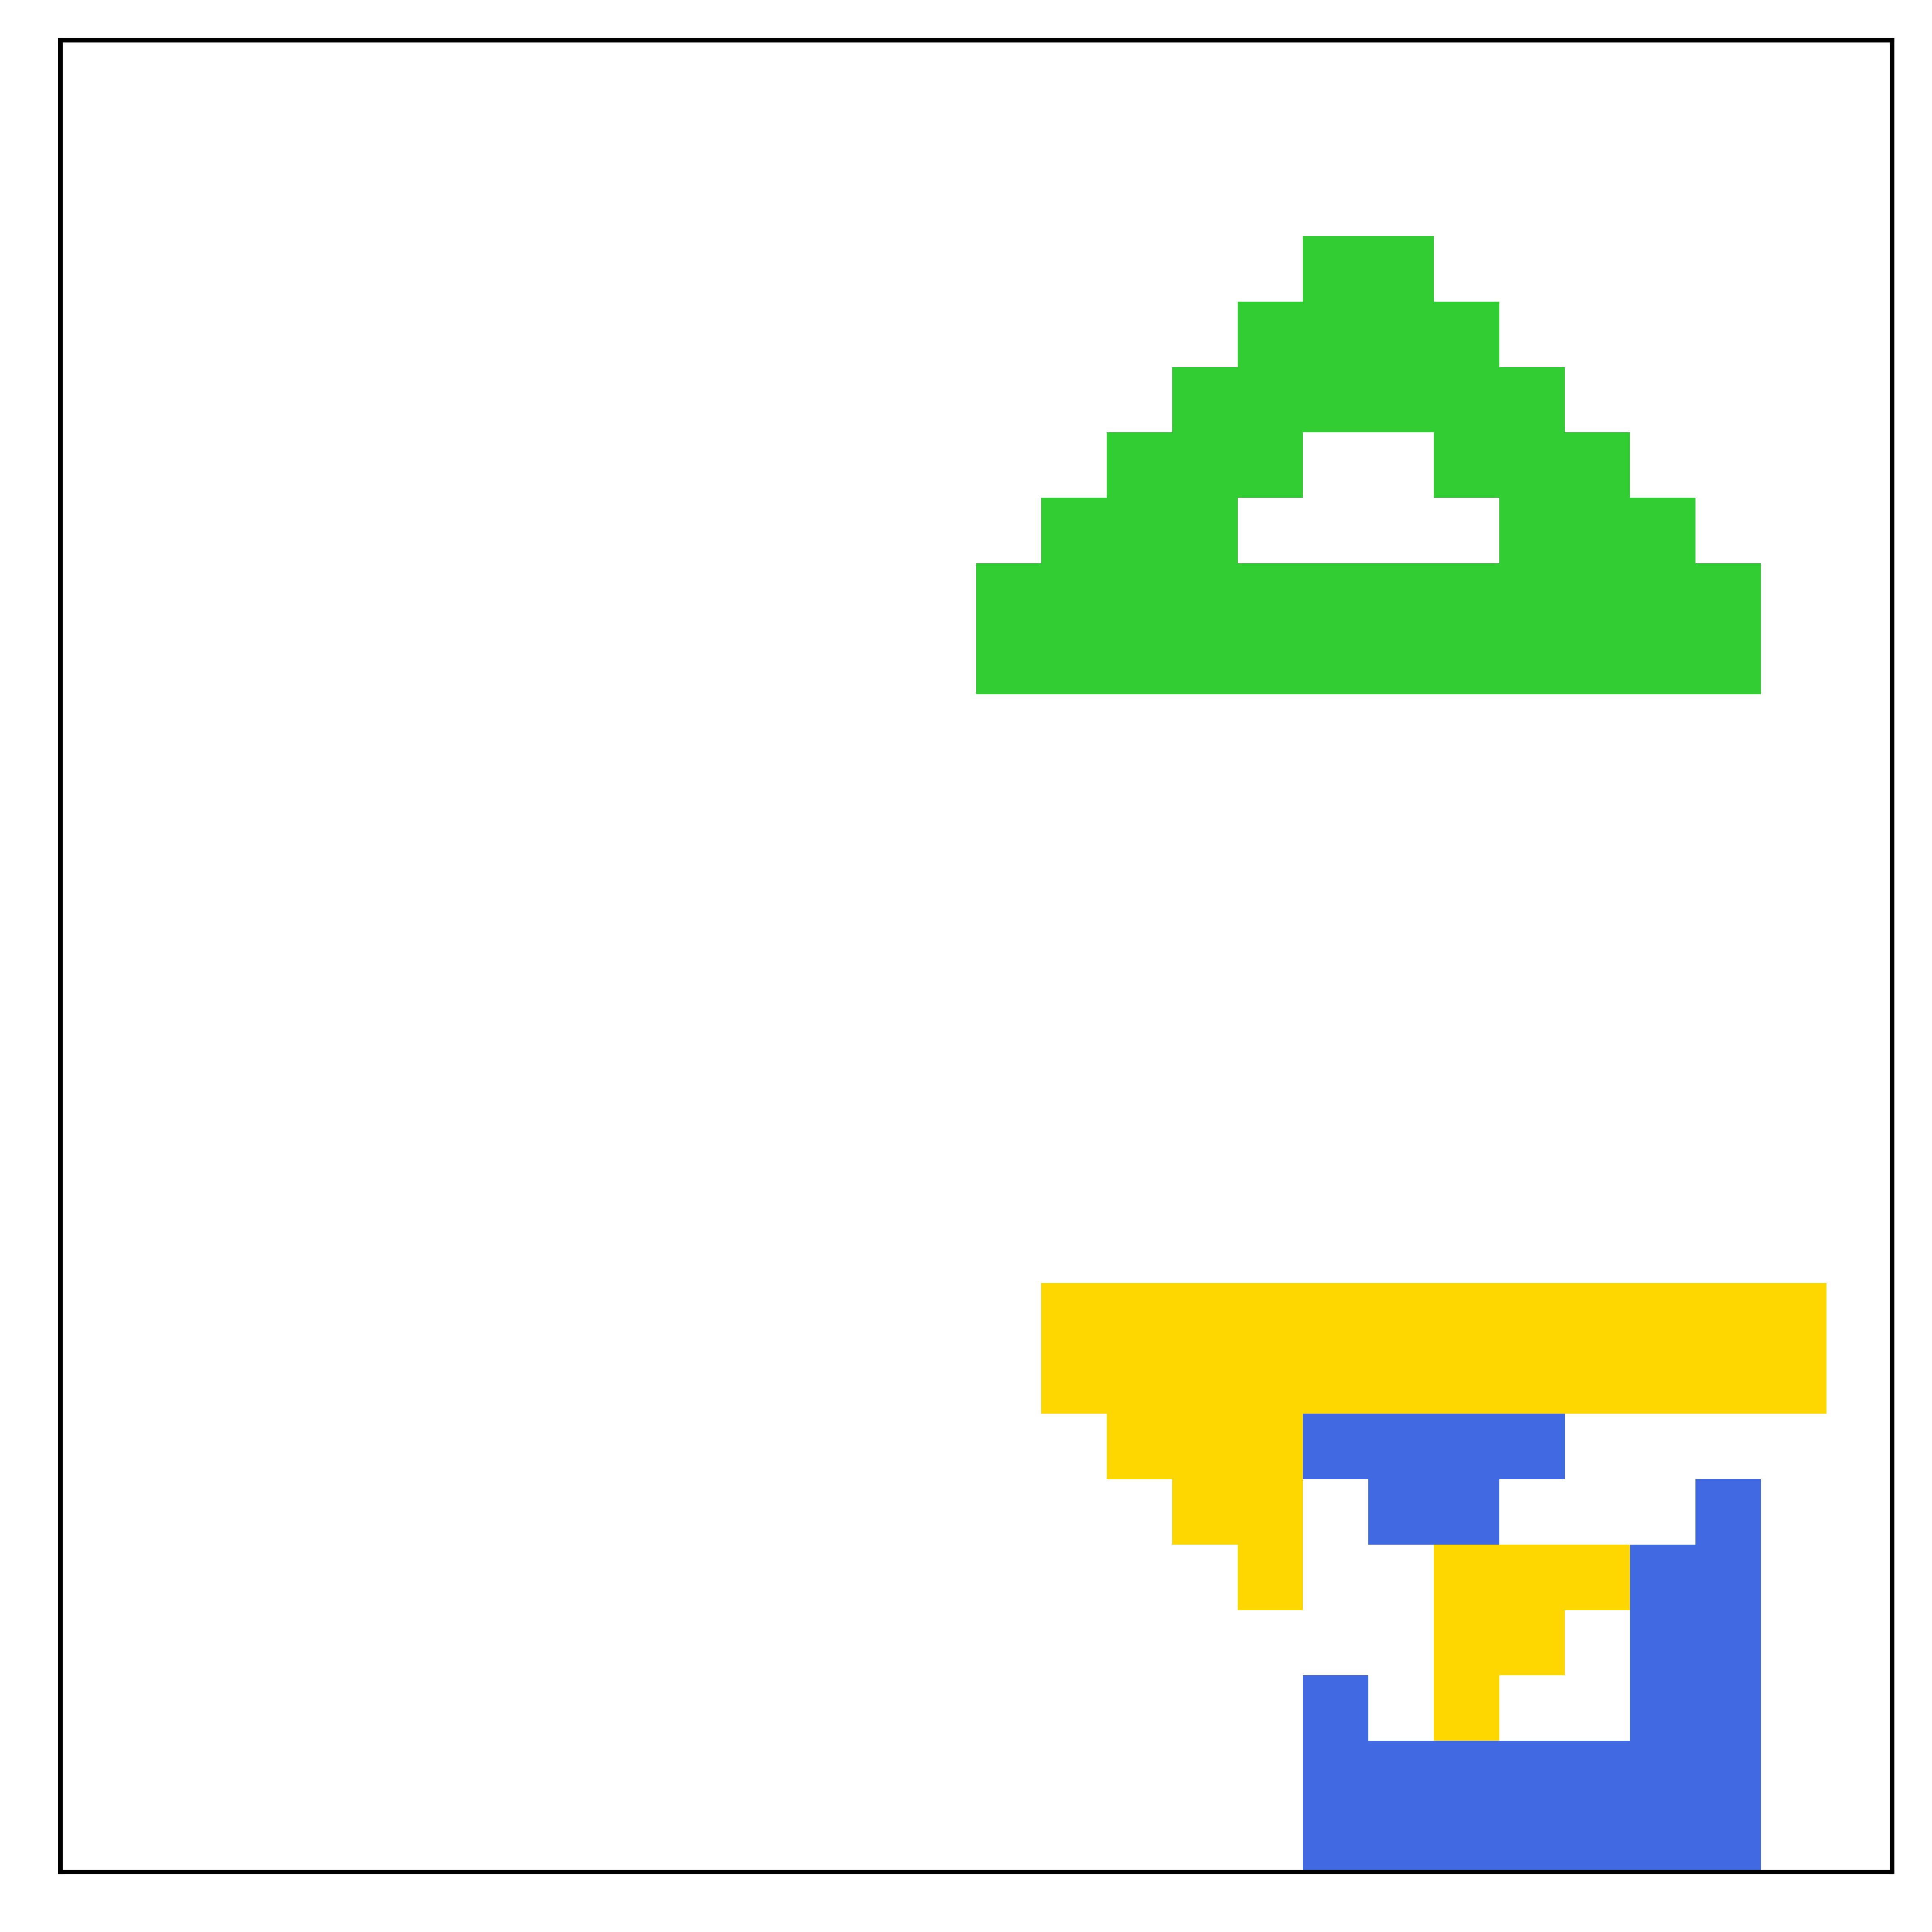

In [4]:
plt.rcParams['figure.figsize'] = (6.0, 6.0) # 单位是inches

plt.figure()
colors = ['white', 'black'] 
cmap = mpl.colors.ListedColormap(colors)
plt.imshow(img, cmap=cmap)
fig = plt.gca()
fig.axes.get_yaxis().set_visible(False)
fig.axes.get_xaxis().set_visible(False)
plt.show()

plt.figure()
colors = ['white', 'gold', 'royalblue', 'limegreen'] 
cmap_obj = mpl.colors.ListedColormap(colors)
plt.imshow(label, cmap=cmap_obj)
fig = plt.gca()
fig.axes.get_yaxis().set_visible(False)
fig.axes.get_xaxis().set_visible(False)
plt.show()

Draw the spiking results

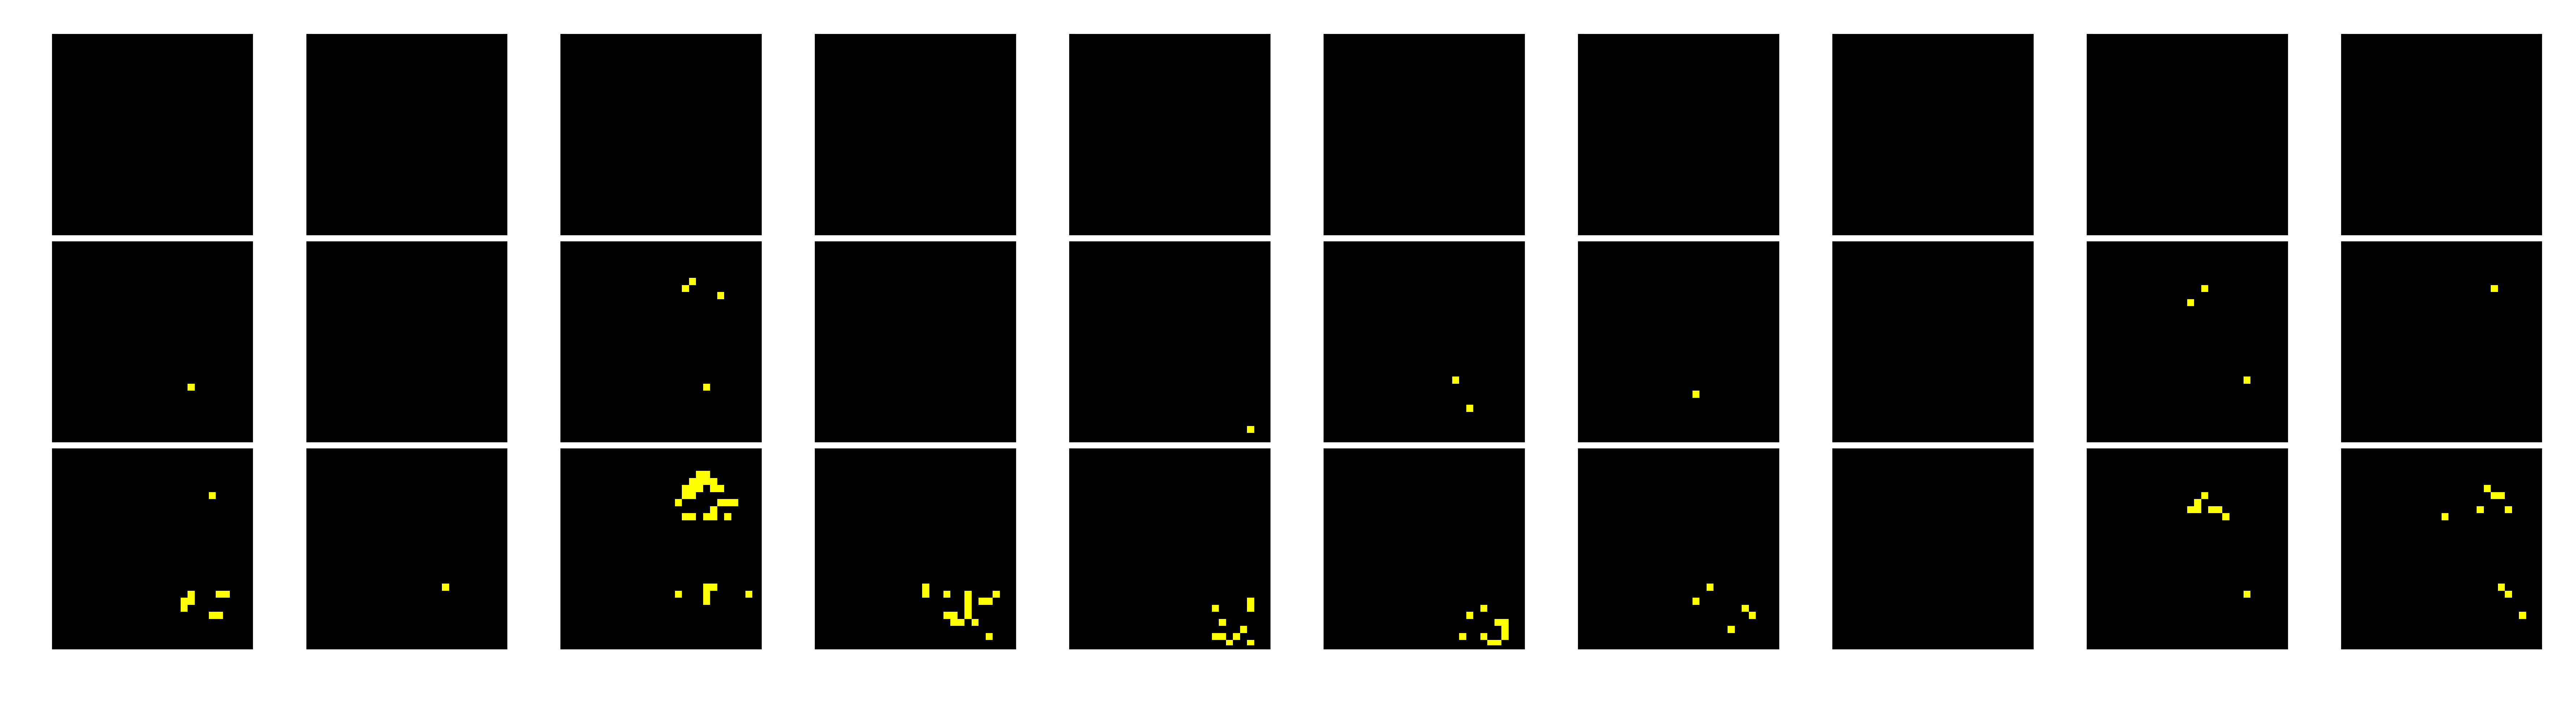

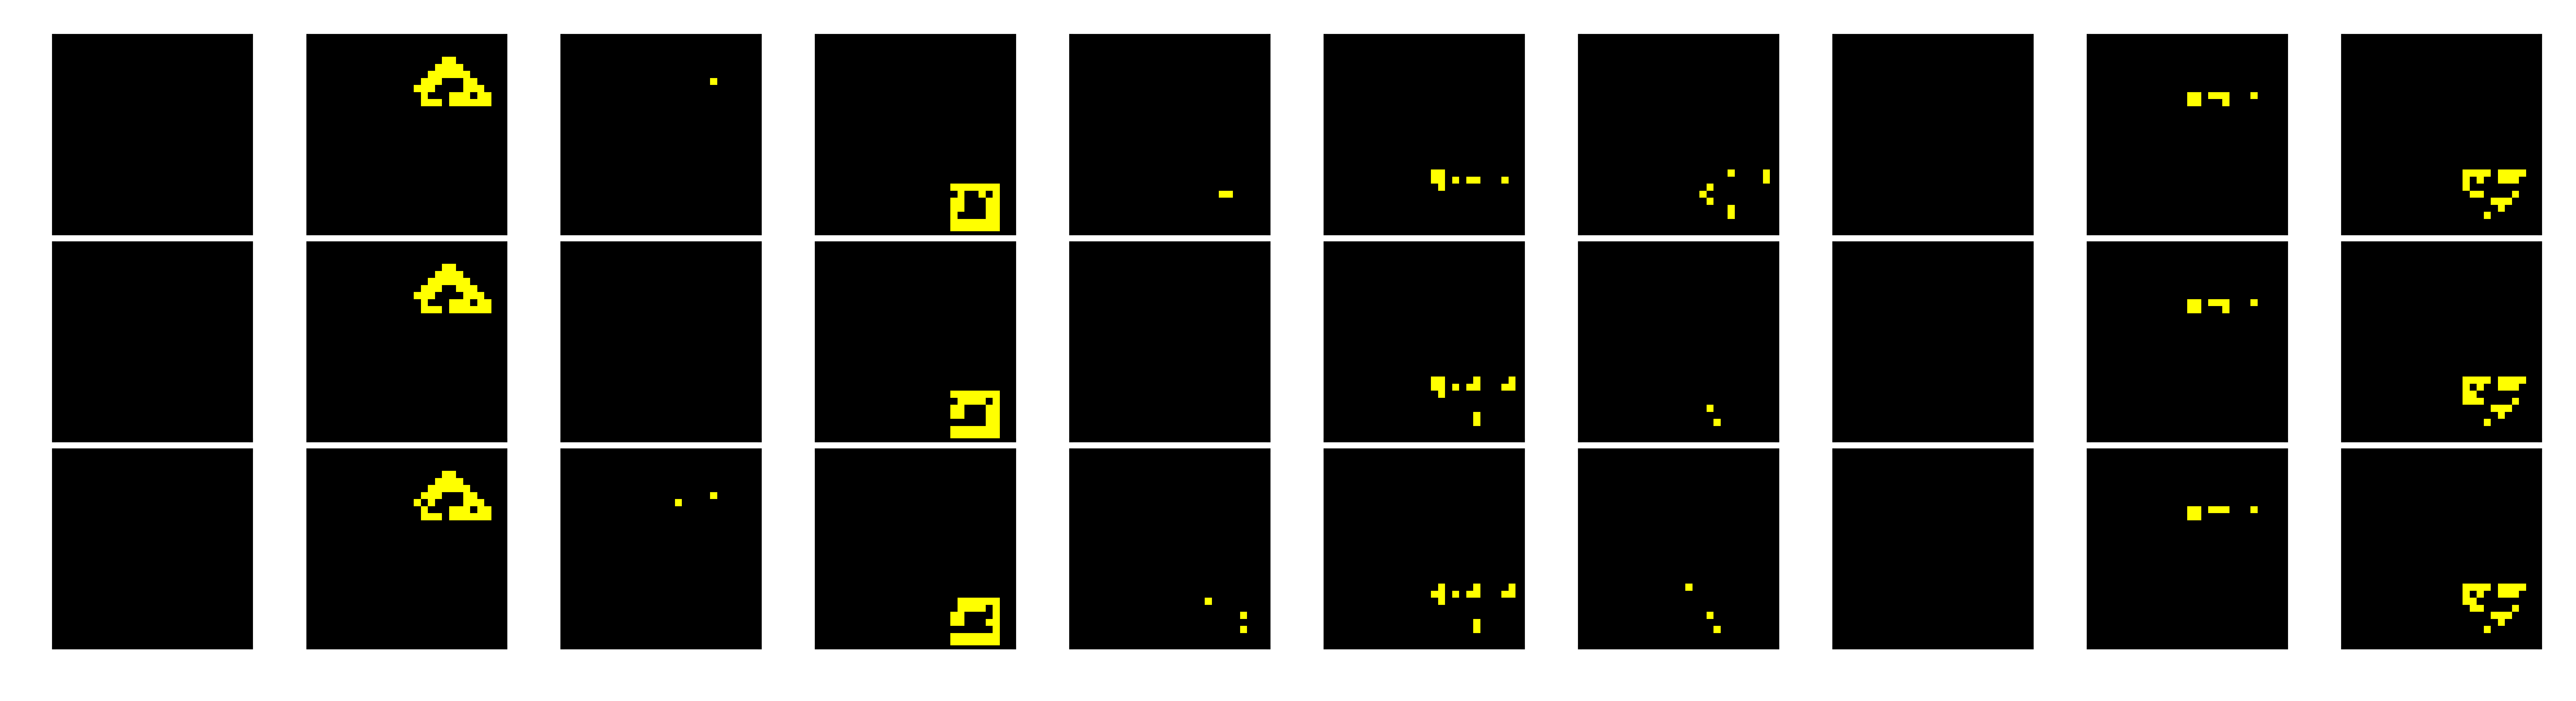

In [5]:
plt.rcParams['figure.figsize'] = (9.0, 3.0) # 单位是inches
def draw_spikes(spike_record, beg, end, name = ''):
    T = spike_record.shape[1]
    fig = plt.figure()
    plt.subplots_adjust(wspace=0.1, hspace=0.05)  # 将高度和宽度百分比缩小到零
    for i in range(beg, end):
        for j in range(T):
            plt.subplot(end - beg + 1, T, (i - beg) * T + j + 1)
            #plt.subplot(8, 8, j + 1)
            # sns.heatmap(spike_record[i,j,:,:], square=True, cmap='viridis_r',
            #             xticklabels=False, yticklabels=False, cbar=False)
            colors = ['black', 'yellow'] 
            cmap = mpl.colors.ListedColormap(colors)
            plt.imshow(spike_record[i, j, :, :], cmap=cmap)
            plt.axis('on')
            plt.box('on')
            frame = plt.gca()
            
            frame.axes.get_yaxis().set_visible(False)
            frame.axes.get_xaxis().set_visible(False)
#             plt.tight_layout()
            
    plt.show()
#     plt.savefig('./fig4/')

sz = spk.shape[0]
draw_spikes(spk, beg=0, end=3)
draw_spikes(spk, beg=sz-3, end=sz)

Draw the binding results

/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/hom

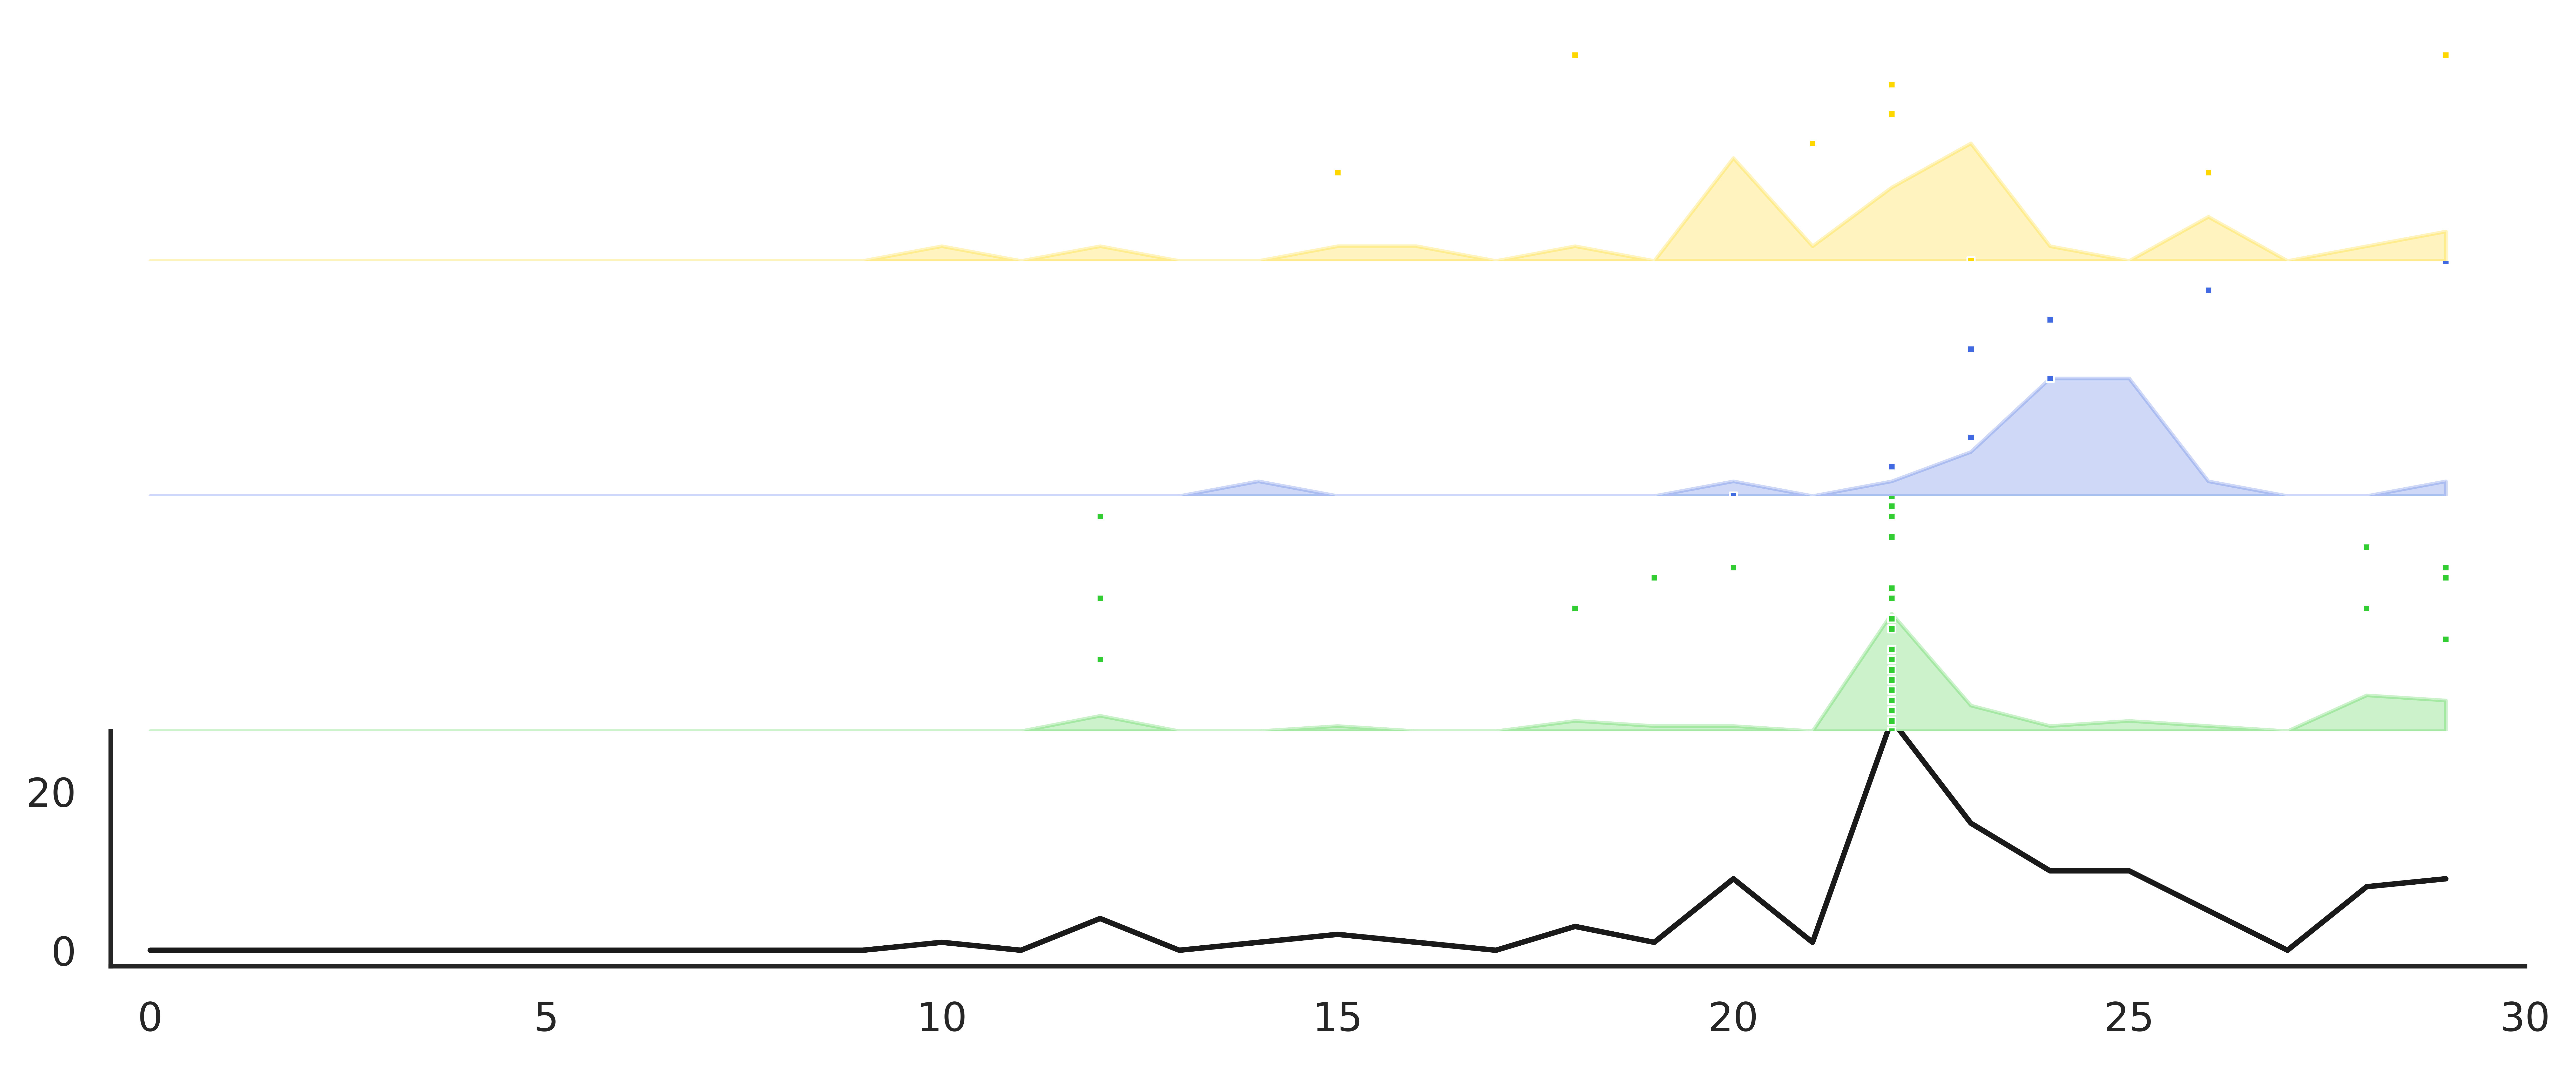

/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/hom

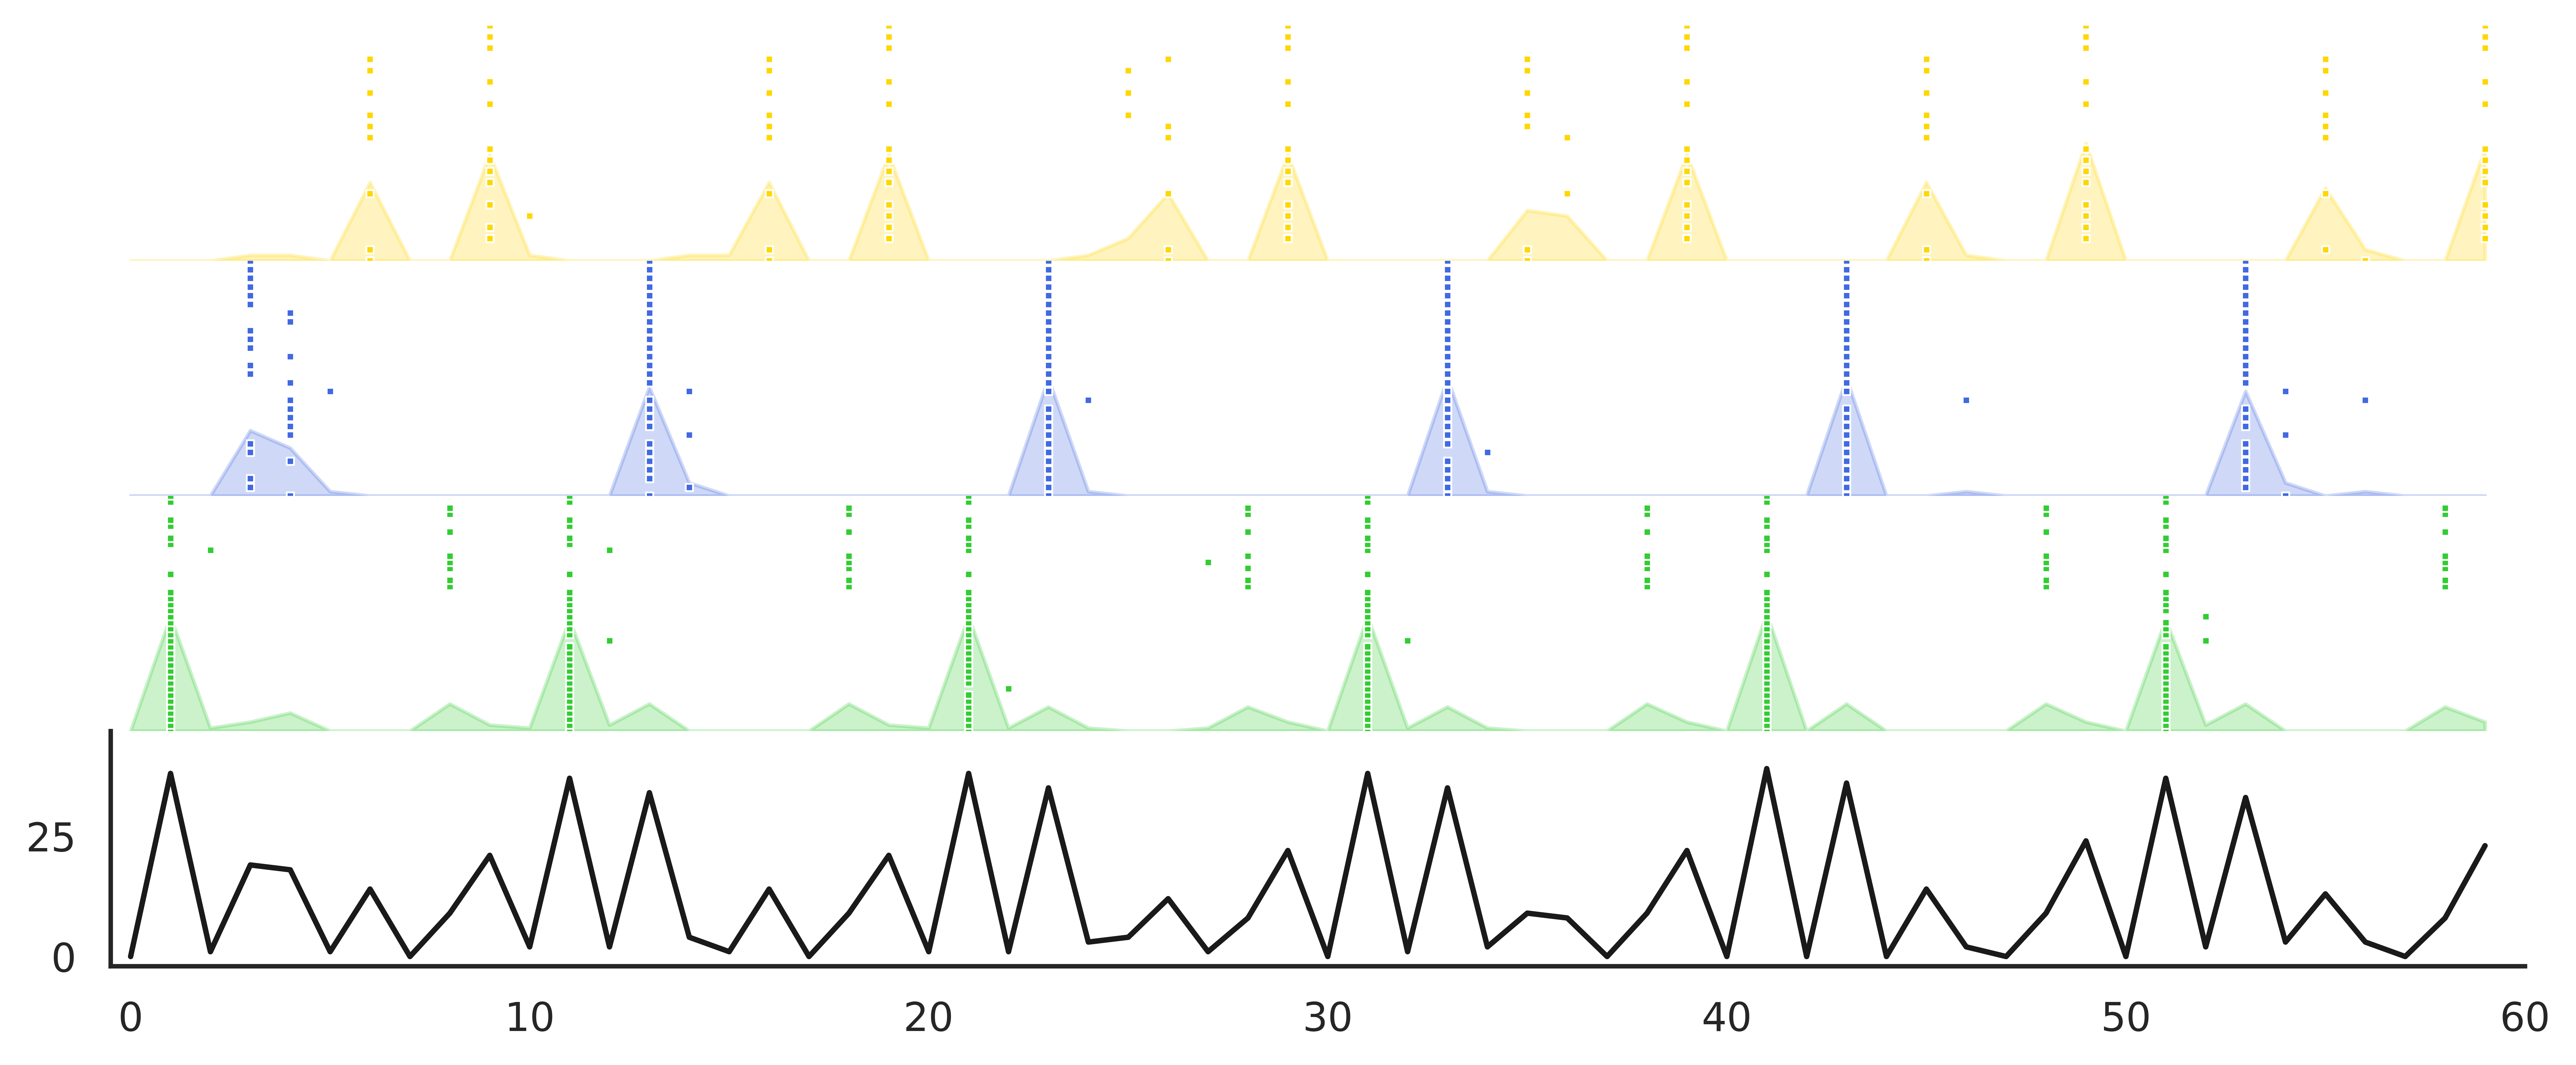

In [9]:
def draw_spike_rasters(spike_record, label, k, color):
    iter = spike_record.shape[0]
    T = spike_record.shape[1]
    spike_record_1d = copy.deepcopy(spike_record.reshape(iter,T,-1))
    size = spike_record_1d.shape[2]
    spike_record_1d = spike_record_1d.reshape(-1, size)

    tmp_idx = np.where(label.reshape(-1) == k)[0]
    spike_record_1d = spike_record_1d[:, tmp_idx]
        
    def get_scatter_data(spk):
        imx = []
        imt = []
        # print("len(spk)[note:win = 32]:", len(spk))
        for i in range(len(spk)):
            for j in range(len(spk[i])):
                if spk[i][j] > 0:
                    imx.append(j)
                    imt.append(i)
        return imx, imt
    
    imx, imt = get_scatter_data(spike_record_1d)
    plt.scatter(imt, imx, alpha=1, s=4, c=color, marker='s', edgecolor='w', linewidth=0.5)
   
def labeled_synchrony_measure(spk, label, back=2, num=2): # low level only
    spk_for_raster = copy.deepcopy(spk)
    K = np.max(label)
    sizex = spk.shape[2]
    sizey = spk.shape[3]
    spk = spk[-back:,:,:,:]
    spk = spk.reshape(-1,sizex,sizey)
    T = spk.shape[0]
    name = ['gold', 'royalblue', 'limegreen', 'coral', 'forestgreen', 'powderblue', 'red','blue','green','yellow','purple','orange','pink','silver','snow','teal','navy','gray']
    groups = np.zeros((int(K),spk.shape[0],spk.shape[1],spk.shape[2])) # K,T,W,H
    selected = np.zeros((int(K),spk.shape[0],num)) # K,T,num
    for t in range(spk.shape[0]):
        for idx in range(spk.shape[1]):
            for idy in range(spk.shape[2]):
                if spk[t,idx,idy]>0:
                    k = int(label[idx, idy])
                    #print(k,t,idx,idy)
                    groups[k-1,t,idx,idy]=1

    for k in range(int(K)):
        id_pol = np.where(groups.sum(1)[k,:,:]>0)
        idx_tmp = np.random.choice(np.arange(len(id_pol[0])),size = num, replace=False)
        selected[k,:,:] = groups[k,:,id_pol[0][idx_tmp],id_pol[1][idx_tmp]].T

    groups = groups.sum(axis=(2, 3))
    t_axis = np.arange(1, T+1)
    
    plt.rcParams['figure.figsize'] = (12.0, 12.0) # 单位是inches
    plt.figure()
    for k in range(int(K)):
        plt.subplot(K+1+num*K, 1, k+1)
        plt.fill_between(t_axis - 1, 0, groups[k, :] * 0.5, color=name[k], alpha=.25)
        draw_spike_rasters(spk_for_raster[-back:], label, k+1, color=name[k])
        plt.ylim([0, groups[k, :].max()])
        plt.xlim([-0.5, t_axis[-1]])
        ax = plt.gca() # 获取当前的axes
        ax.spines['bottom'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('none')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.subplots_adjust(wspace=0,hspace=0)  # 将高度和宽度百分比缩小到零
    plt.subplot(K+1+num*K, 1, K+1)
    tmp = np.zeros_like(groups[0, :])
    for k in range(int(K)):
        tmp += groups[k, :]
    plt.plot(t_axis - 1, tmp, color='k')
    plt.xlim([-0.5, t_axis[-1]])
    plt.ylim([-2, groups[k, :].max() * 1.2])
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.show()

sns.set_theme(style='white')
labeled_synchrony_measure(spk[:3, :, :, :], label, num=2, back=6)
labeled_synchrony_measure(spk, label, num=2, back=6)

Draw AMI and SynScore

<Figure size 12000x2500 with 0 Axes>

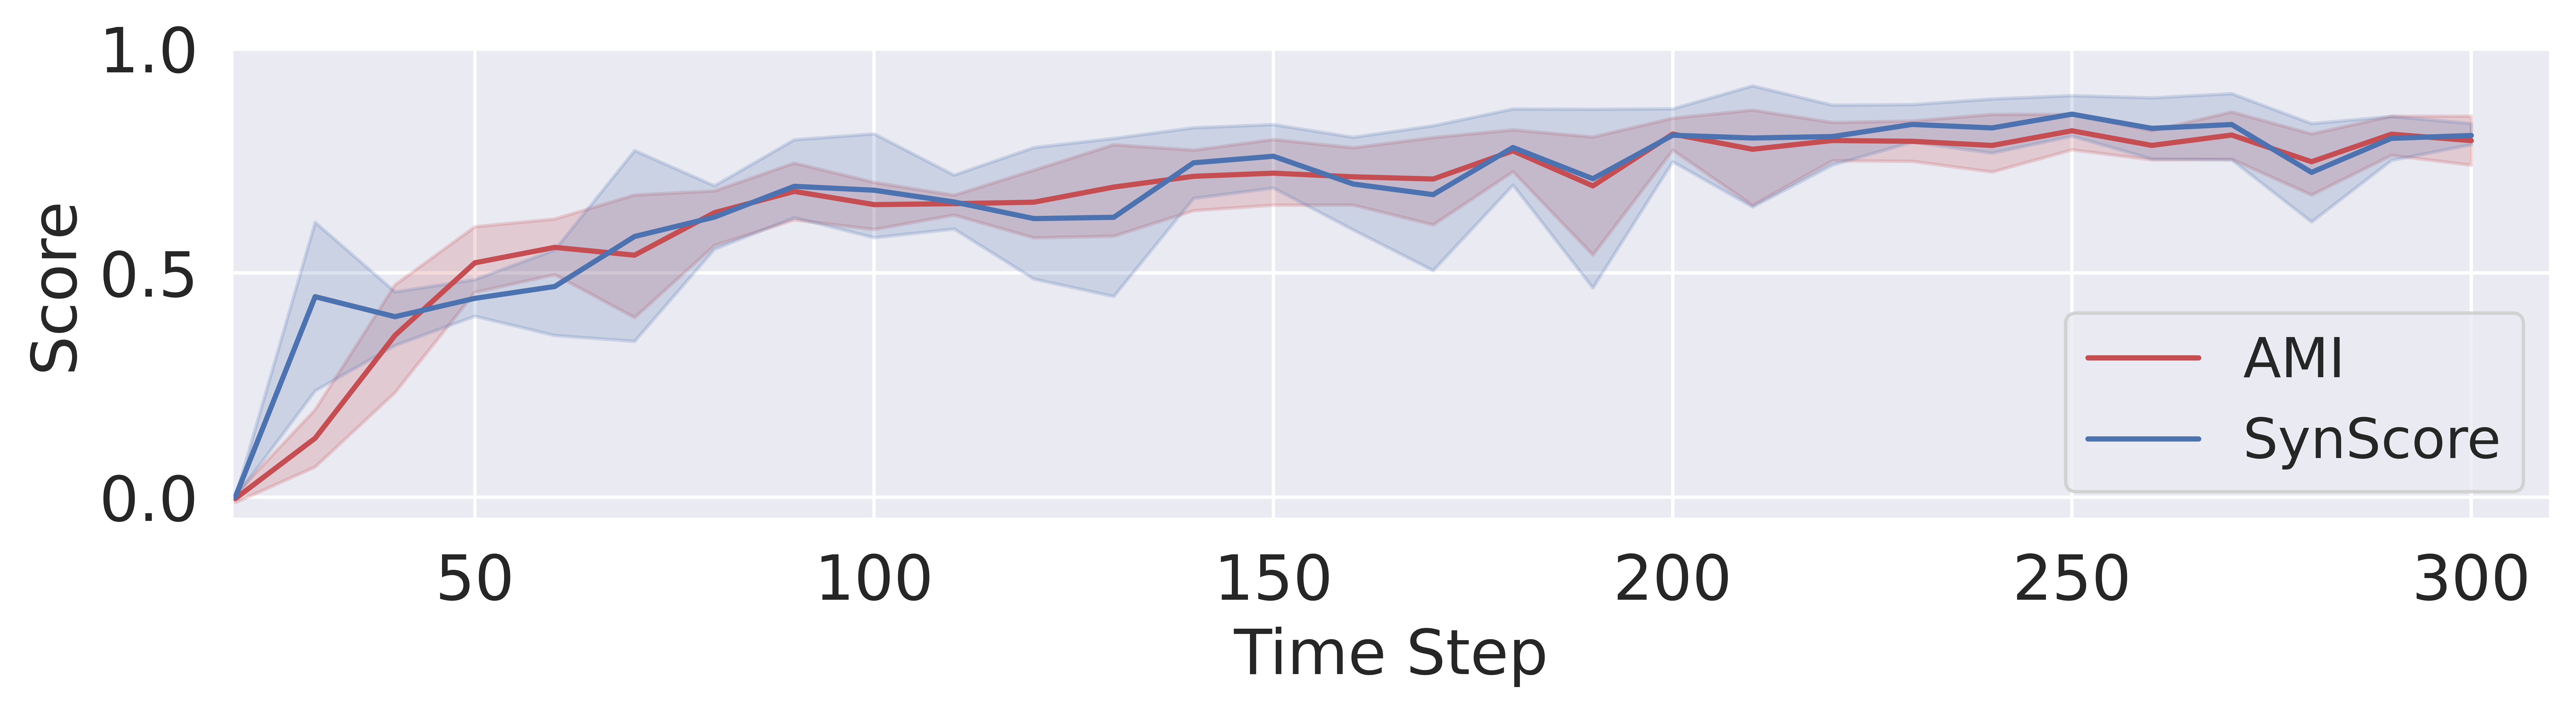

In [7]:
ami = [[0.013263975947179757, 0.24499307168706727, 0.40793335348238985, 0.5706707422790686, 0.4683304520853176, 0.31906127732726947, 0.49262926855382944, 0.5696130516580197, 0.5716882175583282, 0.6662690778805097, 0.4943471689507784, 0.5060086169125606, 0.5866484226204174, 0.6613318371453223, 0.6151968252942365, 0.5246168381918999, 0.7878976394813413, 0.4027658950421245, 0.8654380550882949, 0.9055488575373845, 0.8501935302201918, 0.8621774958859298, 0.911458971586282, 0.8472864864367939, 0.7381807050473, 0.8686851165899705, 0.7730261656845742, 0.8717076140693769, 0.8933934090946961],
      [-0.008877673222345653, 0.10485271536340171, 0.5392415550984542, 0.6566009910476565, 0.6768664861818895, 0.7040922082846053, 0.638761773307947, 0.6291663902585058, 0.5996372914790499, 0.6584854993198322, 0.6461437695643412, 0.7540967083630302, 0.7401772728571127, 0.8409866006469507, 0.7327146171527718, 0.7270259623705929, 0.8563918818872015, 0.8410916264151032, 0.7918357717176809, 0.5516420280825998, 0.8017581326207597, 0.8434636227901604, 0.7851633170480122, 0.8632940733043543, 0.8115495751253595, 0.7165585844397679, 0.6146317461226448, 0.8087931269262809, 0.8410509748113525],
      [0.0043674754250926035, 0.040543021341068124, 0.12823565473885315, 0.48569720656819126, 0.562485925235182, 0.3745122199490886, 0.6646831259490402, 0.6944612088050341, 0.6701256705210763, 0.6088238491445181, 0.6489291123034895, 0.6086853100833806, 0.6947826254945676, 0.7138643137072389, 0.7437386715304973, 0.6539120201411748, 0.6902127033839539, 0.7128804792640423, 0.7437386715304971, 0.7498249837289722, 0.7140551353159177, 0.7264127957594555, 0.6908785552471811, 0.7498249837289722, 0.7433482903096075, 0.7566294104915272, 0.7132477920822217, 0.7264127957594555, 0.7084417410603259],
      [-0.014822934242946867, 0.07580990735148425, 0.3527831773883369, 0.4239024472780609, 0.5084068120634487, 0.6287553485787565, 0.6837332093479939, 0.7746441052901172, 0.6901848552534509, 0.6849978910941945, 0.7631289329088831, 0.8042580166866093, 0.8244437928647146, 0.7958915351083258, 0.832456811860681, 0.8320403836459916, 0.7465325786130391, 0.7336032979955163, 0.7985278910521755, 0.8493024585442793, 0.7720743735841091, 0.7829721446155022, 0.7655136999954184, 0.8451362534375935, 0.8349179738663541, 0.832456811860681, 0.8493800569838728, 0.8235002711935145, 0.7791333379771569],
      [-0.010743387521120477, 0.1907199096674875, 0.37509420843421715, 0.4754022031504057, 0.5684088477364971, 0.6708739493949595, 0.6911334442226267, 0.7405849440023904, 0.7294880432970146, 0.6531178059083964, 0.7355290294887135, 0.7835792714425605, 0.730607335344078, 0.5997244288561451, 0.6469398085655523, 0.8088167305750101, 0.7794844420228457, 0.7794844420228457, 0.8480762502395832, 0.8219765726156113, 0.8375590405419969, 0.7519977594313065, 0.7677719799726876, 0.7784790878526393, 0.7931923625692401, 0.862497330161659, 0.7890308480133171, 0.8157460173091241, 0.7528287145449188]]

syn = [[0.0, 0.6317096212166842, 0.2807531224245145, 0.4690079635750403, 0.25290273302862865, 0.38971056173947627, 0.49747997058434856, 0.6011902363616899, 0.6530996963015957, 0.7567949710367247, 0.45077953105721835, 0.361430058463994, 0.6010316095636818, 0.6433570937331494, 0.5414554402440732, 0.3894970971112022, 0.6882580379567245, 0.22925393554857834, 0.8545151124966114, 0.9363701499118167, 0.8722749472749473, 0.8994177018633539, 0.9379251700680271, 0.8358605136685295, 0.7155659644013682, 0.8727800515880578, 0.7459668240359789, 0.8609607179978198, 0.7736613796040027],
      [0.0, 0.6268839313970359, 0.46756081401226457, 0.5121630610271342, 0.5675004819508536, 0.7584041616530853, 0.6335257637903204, 0.6757606428659059, 0.5177258813787858, 0.7026648821610609, 0.539905934742138, 0.718834481246453, 0.78405277629971, 0.8632886999400908, 0.726045839692325, 0.7331272950064444, 0.8249327956989247, 0.8997620847195889, 0.7134599452767543, 0.5205815323996265, 0.7120027016442647, 0.8651040362274173, 0.8439809686947264, 0.9122308268659528, 0.8979686086257164, 0.6981219070342878, 0.5179596636148244, 0.774806443115251, 0.8556743952552298],
      [0.0, 0.5469023318927818, 0.4731414776736423, 0.3669431355826342, 0.48046344774478905, 0.2049624248032719, 0.6389288969176187, 0.6569646838668578, 0.6651839717741935, 0.5856763148796497, 0.48199395184570915, 0.39867286708749133, 0.6748296761937185, 0.7583312678446308, 0.7375423365714199, 0.5630902702566932, 0.6392483319437916, 0.7183187212872707, 0.7293823326432022, 0.7538477347460724, 0.7610172693685625, 0.7548982915126349, 0.7818460648148148, 0.7591135822702643, 0.7402329889171995, 0.7700375514818703, 0.7690700617116872, 0.766295342588446, 0.7927179962894249],
      [0.0, 0.06537377264661136, 0.3827488074755849, 0.4481006466152247, 0.47669318486904716, 0.7332483846771642, 0.6116120454355748, 0.6326554630207081, 0.6746386527263305, 0.5733657656304935, 0.7251962040227345, 0.723214027964202, 0.853856646825397, 0.8347045068027211, 0.900434712346477, 0.8915584415584416, 0.8530124512267369, 0.8229946005081875, 0.853705847723705, 0.872906609786846, 0.7599908384154046, 0.821906792899471, 0.8325132374929017, 0.8841223619349599, 0.8590363228624783, 0.8971144727175583, 0.9160130144433138, 0.8741285217578321, 0.8036303967566331],
      [0.0, 0.36360943330999024, 0.4073567488280158, 0.41985076250155284, 0.5705829630873566, 0.8194924167733463, 0.7403403405095473, 0.898470292372268, 0.9109623623011016, 0.6721259621694627, 0.9074012297226582, 0.9174254552104941, 0.8136079537032518, 0.70064920916262, 0.5851251640624614, 0.795138888888889, 0.8925755494505495, 0.8795030663780664, 0.883346542564887, 0.9201195104260557, 0.914620075074992, 0.8136924342105264, 0.7200940148305085, 0.8780443948412698, 0.8986607142857144, 0.9160328515652563, 0.6715440477911037, 0.7238575114260657, 0.8060190013906718]
      ]

sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (12.0, 2.5)

def detach_pytorch(x):
    x = [i.detach().cpu().numpy() for i in x]
    x = np.array(x)
    return x

def draw_ami_syn():
    plt.figure()
    itr = []
    amis = []
    syns = []
    for i in range(len(ami)):
        for j in range(len(ami[0])):
            itr.append((j + 2) * 10)
            amis.append(ami[i][j])
            syns.append(syn[i][j])
    data = {}
    data["iter"] = itr
    data["ami mean"] = amis
    data["syn mean"] = syns
    data = pd.DataFrame(data)
    fig = plt.figure()
    sns.lineplot(x="iter", y="ami mean", color="r", data=data)
    sns.lineplot(x="iter", y="syn mean", color="b", data=data)
    fs = 18
    plt.xlabel('Time Step', fontsize=fs)
    plt.ylabel('Score', fontsize=fs)
    plt.ylim([-0.05, 1.0])
    plt.xlim([19.5, 310])
    plt.legend(['AMI', 'SynScore'], fontsize=16, loc='lower right')
    plt.tick_params(labelsize=18)
    plt.show()
    
draw_ami_syn()